# Лабораторная работа №5
### Воложанин Владислав Олегович ИВТ 1.3 

### Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

data = pd.read_csv('web_traffic.tsv', delimiter='\t', names=['hour', 'n_requests'])
data = data.dropna()

input_var = 'hour'
target_var = 'n_requests'

hours_data = data[input_var]
requests_data = data[target_var]


### Разделение данных

In [2]:
train_border = 3.5
divider = int(train_border * 7 * 24)  # 588

hours_data_1, requests_data_1 = hours_data[:divider], requests_data[:divider]
hours_data_2, requests_data_2 = hours_data[divider:], requests_data[divider:]
hours_train, hours_test, requests_train, requests_test = train_test_split(
    hours_data_2, requests_data_2, test_size=0.3, random_state=42)

print(f'Training set size: {hours_train.shape}')
print(f'Testing set size: {hours_test.shape}')

Training set size: (102,)
Testing set size: (45,)


### Итеративное обучение моделей полиномиальной регрессии и расчет метрик ошибок

In [3]:
degrees = [1, 2, 3, 5, 10, 20]
metrics = {}

for degree in degrees:
    coeffs = np.polyfit(hours_train, requests_train, degree)
    poly = np.poly1d(coeffs)
    
    train_rmse = mean_squared_error(requests_train, poly(hours_train), squared=False)
    train_mae = mean_absolute_error(requests_train, poly(hours_train))
    test_rmse = mean_squared_error(requests_test, poly(hours_test), squared=False)
    test_mae = mean_absolute_error(requests_test, poly(hours_test))
    
    metrics[degree] = {
        'coeffs': coeffs,
        'train_rmse': train_rmse,
        'train_mae': train_mae,
        'test_rmse': test_rmse,
        'test_mae': test_mae
    }

for degree, metric in metrics.items():
    print(f"Степень {degree} полинома:")
    print(f"Параметры модели: {metric['coeffs']}")
    print(f"Train RMSE: {metric['train_rmse']}")
    print(f"Train MAE: {metric['train_mae']}")
    print(f"Test RMSE: {metric['test_rmse']}")
    print(f"Test MAE: {metric['test_mae']}")
    print()

Степень 1 полинома:
Параметры модели: [    20.60834926 -10643.68559507]
Train RMSE: 375.98938026077644
Train MAE: 287.9140084705399
Test RMSE: 420.63366775297214
Test MAE: 314.92107367898353

Степень 2 полинома:
Параметры модели: [ 4.82594235e-02 -4.39384236e+01  1.08593275e+04]
Train RMSE: 367.9780536204833
Train MAE: 285.1163223966013
Test RMSE: 378.91000127107196
Test MAE: 275.14305206138675

Степень 3 полинома:
Параметры модели: [ 2.09455986e-04 -3.72275046e-01  2.36832692e+02 -5.14758666e+04]
Train RMSE: 367.7493989418425
Train MAE: 284.07750458914404
Test RMSE: 379.0593592190393
Test MAE: 274.45752424941685

Степень 5 полинома:
Параметры модели: [ 8.03121487e-07 -2.67972923e-03  3.57188674e+00 -2.37740053e+03
  7.90145858e+05 -1.04906858e+08]
Train RMSE: 361.2425340353927
Train MAE: 278.5741004857655
Test RMSE: 370.4315057623351
Test MAE: 267.7249104609092

Степень 10 полинома:
Параметры модели: [ 1.37699179e-16 -7.36456685e-13  1.65505365e-09 -1.94209719e-06
  1.08461837e-03  8.

/opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: Futu

### Визуализация моделей

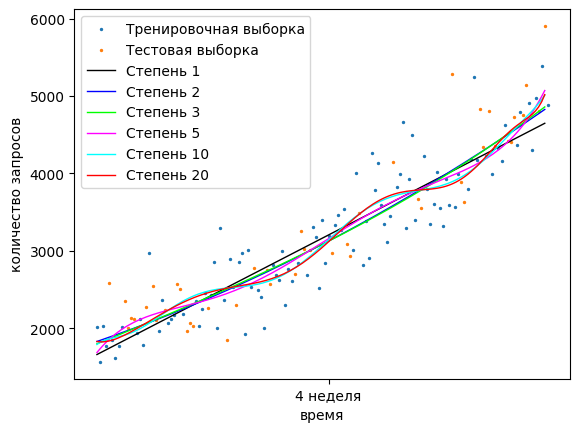

In [4]:
plt.scatter(hours_train, requests_train, s=2, label='Тренировочная выборка')
plt.scatter(hours_test, requests_test, s=2, label='Тестовая выборка')

colors = {1: 'black', 2: 'blue', 3: 'lime', 5: 'magenta', 10: 'cyan', 20: 'red'}

for degree in degrees:
    poly = np.poly1d(metrics[degree]['coeffs'])
    f_x = np.linspace(hours_train.min(), hours_test.max(), len(hours_train) + len(hours_test))
    f_y = poly(f_x)
    plt.plot(f_x, f_y, linewidth=1.0, color=colors[degree], label=f'Степень {degree}')

plt.xlabel('время')
plt.ylabel('количество запросов')
plt.xticks([w*7*24 for w in range(6)], ["%i неделя" %w for w in range(6)])
plt.legend()
plt.autoscale(tight=False)
plt.show()

### Полиномиальные модели более низкой степени (1, 2, 3) имеют более сбалансированные ошибки между тренировочной и тестовой выборками, что делает их более подходящими для данного анализа.